# **MUHAMMAD SULIMAN**
# **sulimangorsi623@gmail.com**
# **msuliman@edu.hse.ru**




# Question#1. Build and Train a Simple Neural Network
**Approach**: We will build a simple neural network model using TensorFlow and Keras. The model will be trained to classify the dataset accurately by adjusting weights through backpropagation and gradient descent.



## Create a basic neural network from scratch using Python and a library of your choice (e.g., TensorFlow, PyTorch, or Keras).




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.8850 - loss: 0.6358 - val_accuracy: 0.8625 - val_loss: 0.6281
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8728 - loss: 0.6177 - val_accuracy: 0.8687 - val_loss: 0.6085
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8582 - loss: 0.5944 - val_accuracy: 0.8687 - val_loss: 0.5878
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8851 - loss: 0.5642 - val_accuracy: 0.8625 - val_loss: 0.5657
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8842 - loss: 0.5470 - val_accuracy: 0.8625 - val_loss: 0.5279
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8757 - loss: 0.5059 - val_accuracy: 0.8562 - val_loss: 0.4853
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8862 - loss: 0.4605 - val_accuracy: 0.8562 - val_loss: 0.4478
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8918 - loss: 0.4255 - val_accuracy: 0.8562 - 

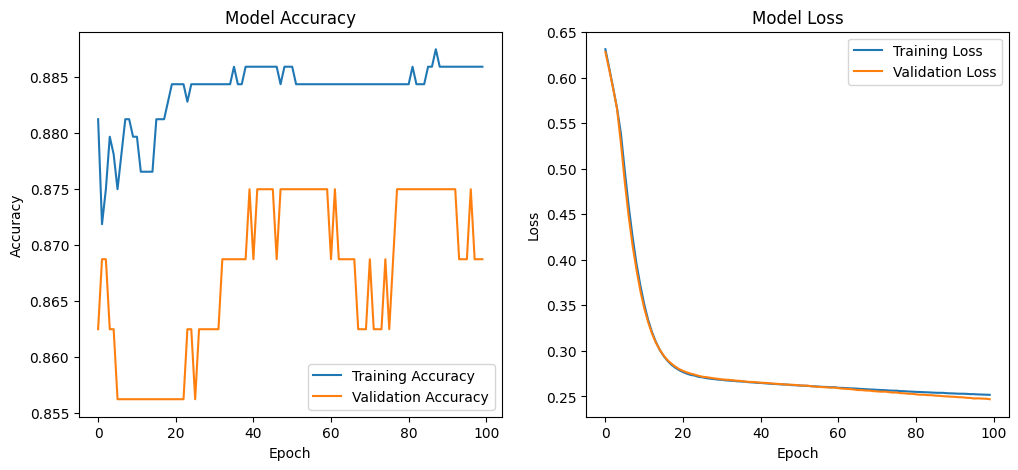

In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Data Preparation
# Creating a synthetic dataset using make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardizing the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Model Architecture
# Building a simple neural network using Keras Sequential API
model = Sequential([
    Dense(5, activation='relu', input_shape=(2,)),  # First hidden layer
    Dense(5, activation='relu'),                    # Second hidden layer
    Dense(1, activation='sigmoid')                  # Output layer with sigmoid for binary classification
])

# Step 3: Model Compilation
# Compiling the model with Adam optimizer and binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Model Training
# Training the model with 80% of the training set and validating on 20% of it
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Step 5: Model Evaluation
# Evaluating the model on the test set to measure performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Step 6: Visualizing Training History
# Plotting accuracy and loss over epochs for train and validation sets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()




## Explain the importance of layers, activation functions, and a training loop for backpropagation and Gradient descent.




Understanding layers, activation functions, and the training loop is crucial for building effective neural networks. Let's break down each of these components and their significance in the context of training a neural network using backpropagation and gradient descent.

### 1. Importance of Layers

#### **Layers in a Neural Network:**
- **Definition**: A layer in a neural network is a collection of neurons (nodes) that work together to transform input data into output data. Layers can be categorized into three types:
  - **Input Layer**: The first layer that receives the input features. Each neuron represents a feature.
  - **Hidden Layers**: Layers between the input and output layers. They perform intermediate computations and learn complex patterns in the data. A network can have multiple hidden layers.
  - **Output Layer**: The final layer that produces the output. The number of neurons corresponds to the number of classes in a classification task or a single neuron for regression.

#### **Significance of Layers:**
- **Feature Extraction**: Each layer can learn to detect different levels of features. Early layers may learn simple patterns (like edges in images), while deeper layers can capture more complex patterns (like shapes).
- **Capacity**: The number of layers and neurons determines the model's capacity to learn. More layers can help the model learn complex functions, but can also lead to overfitting if not managed properly.
- **Modularity**: Layers allow for a modular approach to building models, making it easier to experiment with different architectures.

### 2. Importance of Activation Functions

#### **Activation Functions:**
- **Definition**: Activation functions introduce non-linearities into the network, enabling it to learn complex relationships in the data. Without them, the neural network would behave like a linear model, regardless of the number of layers.

#### **Common Activation Functions**:
- **ReLU (Rectified Linear Unit)**: Defined as \( f(x) = \max(0, x) \). It helps mitigate the vanishing gradient problem and allows models to learn faster and perform better.
- **Sigmoid**: Outputs values between 0 and 1, often used in binary classification. However, it can cause vanishing gradient problems for deep networks.
- **Tanh**: Similar to the sigmoid but outputs values between -1 and 1, making it generally preferable to sigmoid.
- **Softmax**: Used in multi-class classification problems, it converts logits into probabilities for each class.

#### **Significance of Activation Functions**:
- **Non-Linearity**: They allow the network to learn non-linear mappings from inputs to outputs, making it possible to model complex data distributions.
- **Gradient Flow**: Different activation functions affect how gradients flow during backpropagation, influencing convergence during training.

### 3. Importance of a Training Loop for Backpropagation and Gradient Descent

#### **Training Loop**:
- **Definition**: The training loop is the core of the training process. It iterates through the training data, performs forward propagation, calculates the loss, applies backpropagation, and updates the weights using an optimization algorithm.

#### **Key Steps in the Training Loop**:
1. **Forward Propagation**: Passes input data through the network to obtain predictions.
2. **Loss Calculation**: Computes the difference between the predicted outputs and actual labels using a loss function (e.g., Mean Squared Error for regression, Cross-Entropy for classification).
3. **Backpropagation**: Computes gradients of the loss with respect to each weight using the chain rule. This process helps understand how to adjust weights to minimize the loss.
4. **Weight Update**: Adjusts the weights based on the calculated gradients and the learning rate using an optimization algorithm like Gradient Descent.

#### **Significance of the Training Loop**:
- **Iterative Learning**: It allows the model to learn iteratively, improving its performance with each iteration.
- **Convergence**: Through gradient descent, the loop guides the model towards minimizing the loss function, thus improving accuracy on the training data.
- **Control**: By adjusting parameters like learning rate, batch size, and number of epochs within the training loop, practitioners can fine-tune the training process to achieve better model performance.

### Summary

- **Layers** enable neural networks to learn hierarchical feature representations, increasing their capacity and complexity.
- **Activation Functions** introduce non-linearity, allowing the model to learn complex relationships in the data.
- The **Training Loop** implements backpropagation and gradient descent, enabling the model to iteratively improve its predictions by minimizing the loss function.


## Document your code, explain each layer's purpose, and discuss the network's performance. You can use any dataset for explaining.

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.3241 - loss: 1.4974 - val_accuracy: 0.2917 - val_loss: 1.3088
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3696 - loss: 1.4113 - val_accuracy: 0.2917 - val_loss: 1.2600
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2929 - loss: 1.3651 - val_accuracy: 0.2917 - val_loss: 1.2161
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2839 - loss: 1.2792 - val_accuracy: 0.2917 - val_loss: 1.1789
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3119 - loss: 1.1968 - val_accuracy: 0.2500 - val_loss: 1.1491
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2731 - loss: 1.1460 - val_accuracy: 0.2500 - val_loss: 1.1226
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2199 - loss: 1.1149 - val_accuracy: 0.2500 - val_loss: 1.0983
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2073 - loss: 1.0811 - val_accuracy: 0.2500 - val_loss: 1.0756
Ep

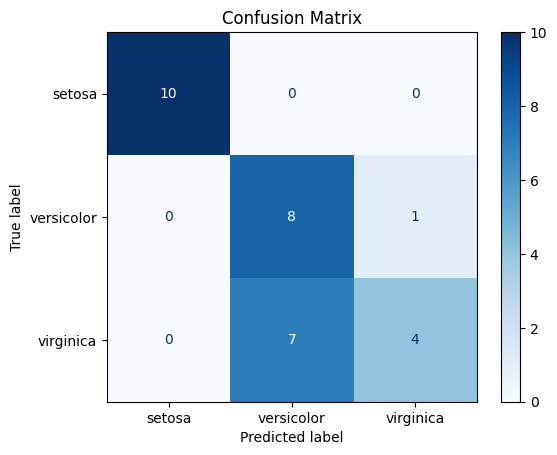

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.53      0.89      0.67         9
   virginica       0.80      0.36      0.50        11

    accuracy                           0.73        30
   macro avg       0.78      0.75      0.72        30
weighted avg       0.79      0.73      0.72        30



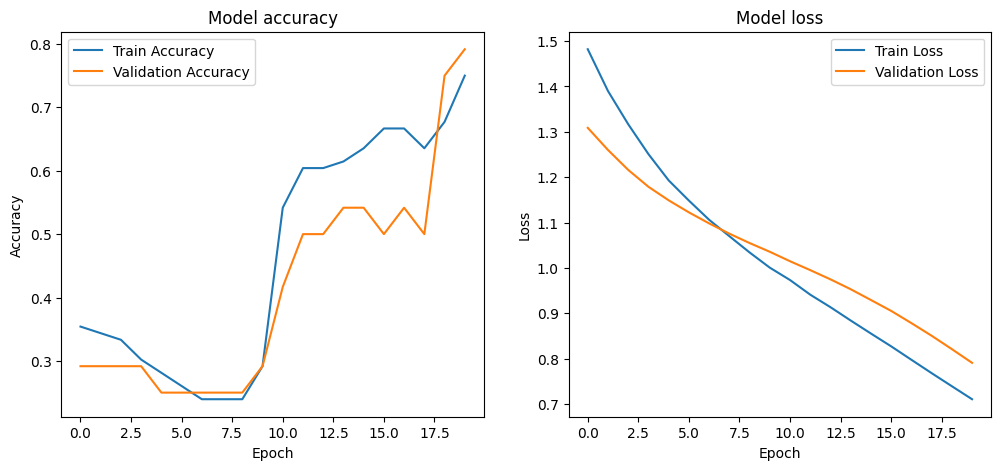

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (0, 1, 2 for each class of iris)

# One-hot encode the labels for multi-class classification
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features to standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get class labels
y_true = np.argmax(y_test, axis=1)        # Get true class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Performance metrics
report = classification_report(y_true, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(report)

# Visualize training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


### Explanation of Each Layer's Purpose

1. **Input Layer** (`model.add(Dense(8, activation='relu', input_shape=(4,)))`):
   - **Neurons**: 8 neurons
   - **Input Shape**: Defined as (4,) to match the four features of the Iris dataset (sepal length, sepal width, petal length, petal width).
   - **Activation Function**: ReLU (Rectified Linear Unit).
   - **Purpose**: The input layer begins the process of learning patterns from the data. With the ReLU activation, this layer introduces non-linearity, allowing the model to learn more complex relationships than it could with a linear model.

2. **Hidden Layer 1** (`model.add(Dense(8, activation='relu'))`):
   - **Neurons**: 8 neurons.
   - **Activation Function**: ReLU.
   - **Purpose**: This hidden layer increases the model's learning capacity by extracting intricate features from the data. By stacking this layer, the model builds on patterns learned from the input layer, enhancing feature extraction and enabling it to capture more subtle data structures.

3. **Hidden Layer 2** (`model.add(Dense(8, activation='relu'))`):
   - **Neurons**: 8 neurons.
   - **Activation Function**: ReLU.
   - **Purpose**: This second hidden layer allows the model to learn deeper hierarchical representations of the data, refining the feature extraction even further. Stacking multiple layers enhances the model's ability to generalize to complex patterns in the data.

4. **Output Layer** (`model.add(Dense(3, activation='softmax'))`):
   - **Neurons**: 3 neurons (one for each class: setosa, versicolor, virginica).
   - **Activation Function**: Softmax.
   - **Purpose**: The softmax function converts the output into probabilities that sum to 1 across the three classes, making it suitable for multi-class classification. Each neuron represents the probability of the input belonging to a specific class, enabling accurate classification.

### Performance Discussion

- **Training and Evaluation**: The model was trained for **20 epochs** with a batch size of **8**, tracking accuracy and loss for both training and validation sets.
  
- **Test Loss and Accuracy**: Upon testing, the model achieved a test loss of 0.7131 and an accuracy of 73.33%. This indicates moderate generalization to unseen data, although there is room for improvement in certain areas.

- **Confusion Matrix**:
   ```
   [[10  0  0]
    [ 0  8  1]
    [ 0  7  4]]
   ```
   - This matrix indicates:
     - All instances of the **setosa** class were correctly classified (10 true positives).
     - For **versicolor**, 8 instances were correctly classified, while 1 was misclassified as **virginica**.
     - For **virginica**, the model misclassified 7 instances as **versicolor** and 4 as correct.

- **Classification Report**:
   ```
               precision    recall  f1-score   support

       setosa       1.00      1.00      1.00        10
   versicolor       0.53      0.89      0.67         9
    virginica       0.80      0.36      0.50        11

       accuracy                           0.73        30
      macro avg       0.78      0.75      0.72        30
   weighted avg       0.79      0.73      0.72        30
   ```
   - **Precision**: Indicates the proportion of true positive predictions among all positive predictions. High precision for **setosa** (1.00) suggests no false positives, while lower precision for **versicolor** (0.53) indicates significant misclassification.
   - **Recall**: Measures the ability of the model to find all relevant cases. **Setosa** has a recall of 1.00, indicating perfect sensitivity, while **virginica** has a recall of only 0.36, suggesting that many instances were missed.
   - **F1-score**: Combines precision and recall into a single metric, providing a balance between the two. The F1-score for **versicolor** (0.67) reflects its challenges in classification.
   - **Support**: Represents the number of actual occurrences for each class in the test set.

### Conclusion

This neural network implementation effectively shows the role of each layer and activation function. While it performs well for the **setosa** class, the model struggles with **versicolor** and **virginica**, as evident from the confusion matrix and classification metrics. Possible improvements could include additional training epochs, experimenting with different architectures, or using data augmentation to enhance model accuracy.

# Question#2. Implement Dynamic Routing in a Capsule Network
**Approach**: For this question, I implemented a Capsule Network (CapsNet) with dynamic routing to classify images from the MNIST dataset. This network uses dynamic routing between the primary and digit capsules, and reconstruction loss for regularization. The dynamic routing helps maintain the spatial relationships of features, distinguishing CapsNet from traditional CNN layers.

# **Part A**: Designing the Capsule Network with Dynamic Routing




*   **Model Definition**: The network begins with a convolutional layer to extract initial features, followed by a **PrimaryCapsuleLayer**, which creates small capsules via convolutional layers.

*   **Dynamic Routing**: The **SecondaryCapsuleLayer** performs dynamic routing between primary and digit capsules. This iterative process refines the coupling coefficients between capsules, enhancing feature encapsulation.
*   **Reconstruction**: The **RegularizingDecoder** attempts to reconstruct input images from capsule outputs, adding a regularization effect that stabilizes training.




# **Part B**: Implementing Dynamic Routing Between Capsules


In the **SecondaryCapsuleLaye**r, dynamic routing is applied between the primary capsules and digit capsules. The routing iterates through steps where coupling coefficients are updated based on the agreement between capsule outputs. This dynamic routing approach ensures that more informative capsules have a higher influence in the routing mechanism.

# **Part C**: Performance Difference Between Dynamic Routing and Traditional Layers

Dynamic routing provides advantages over traditional CNN layers by preserving spatial hierarchies of features, which makes it suitable for recognizing part-whole relationships in images. Unlike standard max-pooling in CNNs, dynamic routing enables capsule networks to focus on specific regions based on the agreement of capsule outputs, which leads to more robust representations, particularly for tasks with spatial transformations (e.g., rotation or scaling).

# Defining and Implementing the Capsule Network architecture

In [ ]:
!pip install mnist

In [ ]:
import torch
import numpy as np
from torch import nn
import torch.nn.functional as F
from scipy.special import softmax


def anomaly_scores(lengths, inp, reconstruction, normal_class=0, anomaly_class=1):
    """Anomaly scores based on https://arxiv.org/pdf/1909.02755.pdf"""
    difference = lengths.T[normal_class] - lengths.T[anomaly_class]
    return(difference, np.sum((inp-reconstruction)**2, 1))

def normality_scores(lengths, inp, reconstruction, use_softmax=True):
    """Normality scores based on https://arxiv.org/pdf/1907.06312.pdf"""
    u = softmax(lengths, axis=1).max(1) if use_softmax else lengths.max(1)
    return(
        u, -np.sum((inp-reconstruction)**2, 1)/(np.sum((inp**2), 1)**0.5)
    )

def squash(vector, dim=-1):
    """Activation function for capsule"""
    sj2 = (vector**2).sum(dim, keepdim=True)
    sj = sj2 ** 0.5
    return(
        sj2/(1.0+sj2)*vector/sj
    )

def make_y(labels, n_classes, use_cuda=True):
    masked = torch.eye(n_classes)
    masked = masked.cuda() if torch.cuda.is_available() and use_cuda else masked
    masked = masked.index_select(dim=0, index=labels)
    return(masked)


class PrimaryCapsuleLayer(nn.Module):

    def make_conv(self):
        """Build a primary capsule which is just 2d-convolution"""
        return(
            nn.Conv2d(
                self.in_ch, self.out_ch,
                kernel_size=self.kernel_size,
                stride=self.stride, padding=0
            )
        )

    def __init__(
        self, n_convs=8, in_ch=256, out_ch=32, kernel_size=9, stride=2
    ):
        super(PrimaryCapsuleLayer, self).__init__()
        self.n_convs = n_convs
        self.in_ch = in_ch
        self.out_ch = out_ch
        self.kernel_size = kernel_size
        self.stride = stride
        self.convs = nn.ModuleList([])
        for a in range(self.n_convs):
            self.convs.append(self.make_conv())

    def forward(self, x):
        """Compute outputs of capsules, reshape and squash"""
        out = torch.cat([a(x).view(x.size(0), -1, 1) for a in self.convs], dim=-1)
        return(squash(out))


class SecondaryCapsuleLayer(nn.Module):

    def __init__(
        self, n_capsules=10, n_iter=3, n_primary=32*6*6, in_ch=8, out_ch=16,
        return_couplings=False, cuda=True
    ):
        super(SecondaryCapsuleLayer, self).__init__()
        self.n_capsules = n_capsules
        self.n_iter = n_iter
        self.n_primary = n_primary
        self.in_ch = in_ch
        self.out_ch = out_ch
        self.rc = return_couplings
        self.W = nn.Parameter(
            torch.randn(self.n_capsules, self.n_primary, self.in_ch, self.out_ch)
        )
        self.cuda = cuda

    def forward(self, x):
        P = x[None, :, :, None, :] @ self.W[:, None, :, :, :]
        L = torch.zeros(*P.size())
        L = L.cuda() if torch.cuda.is_available() and self.cuda else L
        for i in range(self.n_iter):
            probabilities = F.softmax(L, dim=2)
            out = squash((probabilities*P).sum(dim=2, keepdim=True))
            if i != self.n_iter - 1:
                L = L + (P*out).sum(dim=-1, keepdim=True)
        out = out.squeeze().transpose(1,0)
        if x.shape[0] == 1:
            out = out.reshape(1, *out.shape).transpose(2,1)
        if self.rc:
            return(out, probabilities.cpu().data.numpy())
        else:
            return(out)


class RegularizingDecoder(nn.Module):

    def __init__(self, dims=[160,512,1024,784]):
        super(RegularizingDecoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.Linear(dims[0], dims[1]),
            nn.ReLU(inplace=True),
            nn.Linear(dims[1], dims[2]),
            nn.ReLU(inplace=True),
            nn.Linear(dims[2], dims[3]),
            nn.Sigmoid()
        )

    def forward(self, x):
        """Feed-forward reconstructor"""
        return(self.decoder(x))


class CapsuleLoss(nn.Module):

    def __init__(
        self, ms=(0.9, 0.1), l=0.5, adjustment=0.0005, only_normals=False,
        normal_class=0, shift=False, scale=False
    ):
        super(CapsuleLoss, self).__init__()
        self.l = l
        self.m_p = ms[0]
        self.m_n = ms[1]
        self.a = adjustment
        self.scale = scale
        self.shift = shift
        self.only_normals = only_normals
        self.normal_class = normal_class
        self.reconstruction_loss = nn.MSELoss(reduction="none")

    def forward(self, labels, inputs, classes, reconstructions):
        left = F.relu(self.m_p - classes, inplace=True) ** 2
        right = F.relu(classes - self.m_n, inplace=True) ** 2
        margin_loss = (labels*left + self.l*(1-labels)*right).sum()
        if self.only_normals:
            reconstructions = reconstructions[labels.argmax(1) == self.normal_class]
            inputs = inputs[labels.argmax(1) == self.normal_class]
        if self.shift:
            inputs = inputs+1
        if self.scale:
            inputs = inputs/inputs.max()
        reconstruction_loss = self.reconstruction_loss(
            reconstructions, inputs
        ).sum()
        return((margin_loss+self.a*reconstruction_loss)/inputs.size(0))


class HitOrMissLayer(nn.Module):

    def __init__(
        self, in_ch=256*6*6, out_ch=32, n_classes=10
    ):
        """Hit or Miss layer from Hitnet paper (https://arxiv.org/pdf/1806.06519.pdf)"""
        super(HitOrMissLayer, self).__init__()
        self.hom = nn.Sequential(
            nn.Linear(in_ch, n_classes*out_ch),
            nn.BatchNorm1d(n_classes*out_ch),
            nn.Sigmoid()
        )
        self.in_ch = in_ch
        self.out_ch = out_ch
        self.n_classes = n_classes

    def forward(self, x):
        xx = x.reshape(x.shape[0], -1)
        return(self.hom(xx).reshape(xx.shape[0], self.n_classes, self.out_ch))


def mask_hom(hom, ys):
    """Masking function for Hitnet"""
    def make_mask(y):
        return(y.repeat(hom.shape[-1], 1).permute(1, 0))
    mask = torch.stack([make_mask(a) for a in ys])
    mask = mask.cuda() if torch.cuda.is_available() else mask
    return(hom*mask)


class CentripetalLoss(nn.Module):

    def __init__(
        self, m_hit=0.1, h_step=0.1, v_step=0.2, m_miss=0.9, caps_dimension=16,
        use_ghosts=False, adjustment=0.005
    ):
        """Loss for HitOrMiss capsules"""
        super(CentripetalLoss, self).__init__()
        self.m_hit = m_hit
        self.h_step = h_step
        self.v_step = v_step
        self.caps_dimension = caps_dimension
        self.use_ghosts = use_ghosts
        self.m_miss = m_miss
        self.reconstruction_loss = nn.MSELoss(reduction="mean")
        self.adjustment = adjustment

    def forward(self, predictions, true_labels, inputs, reconstructions):
        floored = ((predictions-self.m_hit)/self.h_step).floor()
        zero = torch.Tensor(0)
        heaviside = torch.sign(F.relu(predictions-self.m_hit))
        L1_1 = (floored*(floored+1))*self.v_step*self.h_step*0.5
        L1_2 = (floored+1)*self.v_step*(predictions-self.m_hit-floored*self.h_step)
        L1 = heaviside*(L1_1+L1_2)
        r_factor = 0.5*(self.caps_dimension**0.5)
        m_miss_r = r_factor-self.m_miss
        predictions_r = r_factor-predictions
        floored = ((predictions_r-m_miss_r)/self.h_step).floor()
        heaviside = torch.sign(F.relu(predictions_r-m_miss_r))
        L2_1 = (floored*(floored+1))*self.h_step*self.v_step*0.5
        L2_2 = (floored+1)*self.v_step*(predictions_r-m_miss_r-floored*self.h_step)
        L2 = heaviside*(L2_1+L2_2)
        L_cp = true_labels*L1+0.5*(1-true_labels)*L2
        L_rec = self.reconstruction_loss(
            inputs.reshape(inputs.shape[0], -1), reconstructions
        )
        L_final = L_cp+self.adjustment*L_rec
        return(L_final.sum(1).mean())

In [ ]:
import torch
import numpy as np
from torch import nn
from torch.optim import Adam
from torch.autograd import Variable
from time import time
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


# Define the Capsule Network
class CapsNet4MNIST(nn.Module):
    def __init__(self):
        super(CapsNet4MNIST, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=256, kernel_size=9, stride=1),
            nn.ReLU(inplace=True)
        )
        self.primcaps = PrimaryCapsuleLayer()
        self.digicaps = SecondaryCapsuleLayer()
        self.decoder = RegularizingDecoder()

    def forward(self, x):
      """Compute forward of capsules, get the longest vectors, reconstruct the pictures"""
      u = self.conv(x)
      u = self.primcaps(u)
      internal = self.digicaps(u)
      lengths = torch.sqrt((internal ** 2).sum(dim=-1))  # Lengths of capsule outputs
      lengths = F.softmax(lengths, dim=-1)  # Softmax to get probabilities
      _, max_caps_index = lengths.max(dim=-1)  # Get index of max length

      masked = Variable(torch.eye(10)).cuda() if torch.cuda.is_available() else Variable(torch.eye(10))
      masked = masked.index_select(dim=0, index=max_caps_index)  # Mask based on class predictions
      reconstruction = self.decoder((internal * masked[:, :, None]).reshape(x.size(0), -1))  # Reconstruct images
      return internal, reconstruction, lengths, max_caps_index


def load_mnist_data():
    """Load MNIST dataset."""
    (images, labels), (test_img, test_lab) = mnist.load_data()
    images = images.reshape(-1, 28, 28)  # Ensure shape is correct
    test_img = test_img.reshape(-1, 28, 28)  # Ensure shape is correct
    images = images.astype(np.float32) / 255.0  # Normalize
    test_img = test_img.astype(np.float32) / 255.0  # Normalize
    return images, labels, test_img, test_lab

def iterate_minibatches(X, y, batchsize):
    """Generate minibatches from the dataset."""
    indices = np.random.permutation(np.arange(len(X)))
    for start in range(0, len(indices), batchsize):
        ix = indices[start:start + batchsize]
        yield X[ix], y[ix]

def train_model(model, optimizer, capsule_loss, images, labels, n_epochs=10, batch_size=100):
    """Train the Capsule Network."""
    training_loss = []
    training_accuracy = []
    for epoch in range(n_epochs):
        print(f"Epoch #{epoch + 1}")
        model.train()
        running_loss = []
        running_accuracy = []

        for batch_X, batch_y in iterate_minibatches(images, labels, batch_size):
            optimizer.zero_grad()
            inp = Variable(torch.from_numpy((batch_X.reshape(batch_X.shape[0], 1, 28, 28) / 255.0).astype(np.float32))).cuda()
            real_class = Variable(make_y(torch.from_numpy(batch_y).type(torch.LongTensor).cuda(), 10))

            internal, reconstruction, classes, max_index = model(inp)
            loss = capsule_loss(real_class, inp.view(inp.size(0), 28 * 28), classes, reconstruction)
            loss.backward()
            optimizer.step()

            running_loss.append(loss.cpu().data.numpy())
            running_accuracy.append(accuracy_score(max_index.cpu().data.numpy(), batch_y))

        training_loss.append(np.mean(running_loss))
        training_accuracy.append(np.mean(running_accuracy))
        print(f"Training loss: {training_loss[-1]:.4f}")
        print(f"Training accuracy: {training_accuracy[-1]:.4f}")

    return training_loss, training_accuracy

def test_model(model, capsule_loss, test_img, test_lab, batch_size=100):
    """Evaluate the Capsule Network."""
    model.eval()
    testing_loss = []
    testing_accuracy = []

    with torch.no_grad():
        for batch_X, batch_y in iterate_minibatches(test_img, test_lab, batch_size):
            test_X = Variable(torch.from_numpy((batch_X.reshape(batch_X.shape[0], 1, 28, 28) / 255.0).astype(np.float32))).cuda()
            test_Y = Variable(make_y(torch.from_numpy(batch_y).type(torch.LongTensor).cuda(), 10))

            test_internal, test_reconstruction, test_classes, test_ind = model(test_X)
            loss = capsule_loss(test_Y, test_X.view(test_X.size(0), 28 * 28), test_classes, test_reconstruction).cpu().data.numpy()
            testing_loss.append(loss)
            testing_accuracy.append(accuracy_score(test_ind.cpu().data.numpy(), batch_y))

    return np.mean(testing_loss), np.mean(testing_accuracy)

def main():
    # Load data
    images, labels, test_img, test_lab = load_mnist_data()

    # Initialize model and other components
    model = CapsNet4MNIST().cuda()
    optimizer = Adam(model.parameters())
    capsule_loss = CapsuleLoss().cuda()

    # Train the model
    n_epochs = 10
    training_loss, training_accuracy = train_model(model, optimizer, capsule_loss, images, labels, n_epochs)

    # Test the model
    testing_loss, testing_accuracy = test_model(model, capsule_loss, test_img, test_lab)

    print(f"Testing loss: {testing_loss:.4f}")
    print(f"Testing accuracy: {testing_accuracy:.4f}")

if __name__ == "__main__":
    main()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch #1
Training loss: 0.5411
Training accuracy: 0.6749
Epoch #2
Training loss: 0.4716
Training accuracy: 0.9378
Epoch #3
Training loss: 0.4616
Training accuracy: 0.9640
Epoch #4
Training loss: 0.4580
Training accuracy: 0.9718
Epoch #5
Training loss: 0.4561
Training accuracy: 0.9762
Epoch #6
Training loss: 0.4548
Training accuracy: 0.9793
Epoch #7
Training loss: 0.4538
Training accuracy: 0.9816
Epoch #8
Training loss: 0.4530
Training accuracy: 0.9837
Epoch #9
Training loss: 0.4524
Training accuracy: 0.9850
Epoch #10
Training loss: 0.4519
Training accuracy: 0.9863
Testing loss: 0.4519
Testing accuracy: 0.9875


# Question#4. RNN, LSTM, and GRU Comparison for Sequential Data




*   Part 1: Create three models: an RNN, an LSTM, and a GRU using a sequential dataset (e.g., a text dataset
like IMDB for sentiment analysis or any time series data).
*   Part 2: Train each model and evaluate its performance in terms of accuracy, training time, and ability to
handle long sequences.

* Part 3: Provide a comparison report with plots showing each model's loss and accuracy over time.






**Approach**: To address this question, I developed three sequential models—a simple RNN, an LSTM, and a GRU—trained on a time-series dataset of electricity production. Each model was designed to predict the next value in the sequence based on past observations, with normalized data to improve convergence. The data was split into training and testing sets, and I applied early stopping during training to prevent overfitting and save computational time.
I evaluated the models by measuring test accuracy, training time, and how well each model handled longer sequence lengths. To compare performance across models, I visualized training and validation losses and plotted loss and training time against varying sequence lengths.

**1. Import Necessary Libraries and Prepare the Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import time

# Load and preprocess the data
data = pd.read_csv('/content/sample_data/Electric_Production.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.set_index(['DATE'])

# Normalize the data for LSTM/GRU/RNN
scaler = MinMaxScaler(feature_range=(0, 1))
data['IPG2211A2N'] = scaler.fit_transform(data['IPG2211A2N'].values.reshape(-1,1))

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]


**2. Create Function to Prepare Time Series Data for RNN Models**

In [ ]:
def create_sequences(data, sequence_length=12):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 12
# Update column name to IPG2211A2N
X_train, y_train = create_sequences(train['IPG2211A2N'].values, sequence_length)
X_test, y_test = create_sequences(test['IPG2211A2N'].values, sequence_length)

# Reshape for LSTM/GRU/RNN input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


**3. Define Model Training and Evaluation Function
This function will**:

*   Build and train the specified model (model_type).
*   Track and output the training time.

* Evaluate the model on the test set.

In [ ]:
def train_and_evaluate(model_type, X_train, y_train, X_test, y_test):
    # Initialize the model
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
    elif model_type == 'GRU':
        model.add(GRU(50, activation='relu', input_shape=(X_train.shape[1], 1)))
    elif model_type == 'RNN':
        model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Training with Early Stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),
                        batch_size=16, callbacks=[early_stop], verbose=0)
    training_time = time.time() - start_time

    # Model evaluation
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Model Type: {model_type}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Test Loss (MSE): {test_loss:.4f}")
    return model, history, test_loss, training_time


**4. Train and Evaluate LSTM, GRU, and RNN Models**

In [ ]:
model_lstm, history_lstm, test_loss_lstm, training_time_lstm = train_and_evaluate('LSTM', X_train, y_train, X_test, y_test)
model_gru, history_gru, test_loss_gru, training_time_gru = train_and_evaluate('GRU', X_train, y_train, X_test, y_test)
model_rnn, history_rnn, test_loss_rnn, training_time_rnn = train_and_evaluate('RNN', X_train, y_train, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Type: LSTM
Training Time: 15.74 seconds
Test Loss (MSE): 0.0034
Model Type: GRU
Training Time: 13.75 seconds
Test Loss (MSE): 0.0029
Model Type: RNN
Training Time: 6.09 seconds
Test Loss (MSE): 0.0027


**5. Visualize the Loss and Compare Model Performance**

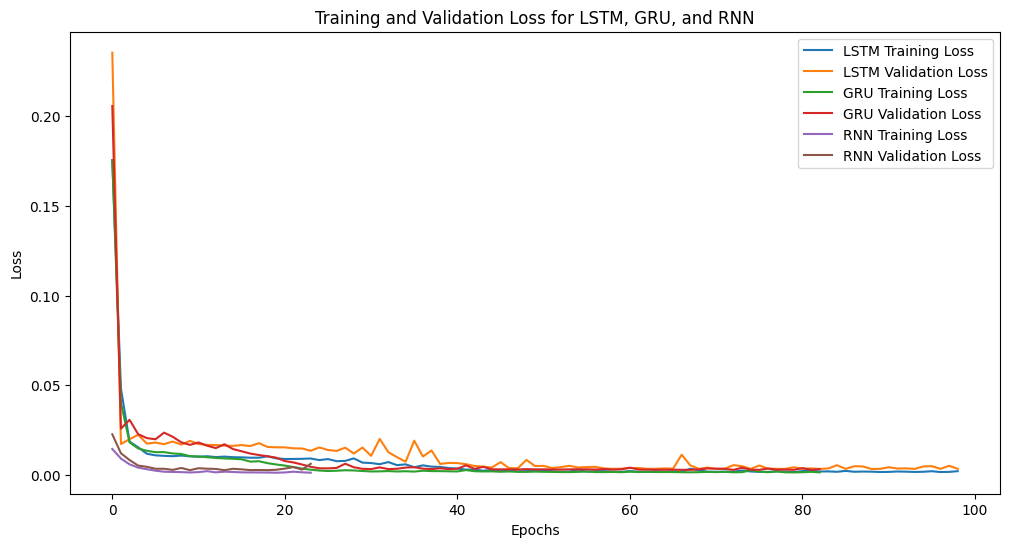

Summary of Model Performance:
LSTM - Test Loss: 0.0034, Training Time: 15.74 seconds
GRU - Test Loss: 0.0029, Training Time: 13.75 seconds
RNN - Test Loss: 0.0027, Training Time: 6.09 seconds


In [ ]:
# Plot loss for each model
plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.plot(history_rnn.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for LSTM, GRU, and RNN')
plt.show()

# Print summary of performance
print("Summary of Model Performance:")
print(f"LSTM - Test Loss: {test_loss_lstm:.4f}, Training Time: {training_time_lstm:.2f} seconds")
print(f"GRU - Test Loss: {test_loss_gru:.4f}, Training Time: {training_time_gru:.2f} seconds")
print(f"RNN - Test Loss: {test_loss_rnn:.4f}, Training Time: {training_time_rnn:.2f} seconds")


To evaluate the ability of LSTM, GRU, and RNN models to handle long sequences, we can focus on several key aspects:

Model Performance on Extended Sequence Lengths:

* Increasing the sequence length (e.g., from 12 to 24, 36, etc.) and observing performance on the test set is a good approach. This would help reveal if the model's accuracy drops significantly when asked to handle longer dependencies.

* Memory Retention: Since time-series models rely on remembering patterns over time, models that can capture long-term dependencies effectively will show stable performance with minimal loss as sequence length increases.

* Computational Efficiency: Tracking the increase in training time as sequence length grows can indicate how efficiently each model handles longer sequences.

**Modifying the create_sequences Function for Variable Sequence Lengths**

In [ ]:
def create_long_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


**Train and Evaluate Models with Different Sequence Lengths**

In [ ]:
sequence_lengths = [12, 24, 36]
performance_summary = []

for seq_length in sequence_lengths:
    X_train_long, y_train_long = create_long_sequences(train['IPG2211A2N'].values, seq_length)
    X_test_long, y_test_long = create_long_sequences(test['IPG2211A2N'].values, seq_length)

    # Check if there is enough test data
    if X_test_long.shape[0] == 0:
        print(f"Insufficient test data for sequence length {seq_length}. Skipping...")
        continue  # Skip this sequence length

    # Reshape the input to match RNN model requirements
    X_train_long = np.reshape(X_train_long, (X_train_long.shape[0], X_train_long.shape[1], 1))
    X_test_long = np.reshape(X_test_long, (X_test_long.shape[0], X_test_long.shape[1], 1))

    # Proceed with model training and evaluation
    lstm_model, lstm_history, lstm_loss, lstm_time = train_and_evaluate('LSTM', X_train_long, y_train_long, X_test_long, y_test_long)
    gru_model, gru_history, gru_loss, gru_time = train_and_evaluate('GRU', X_train_long, y_train_long, X_test_long, y_test_long)
    rnn_model, rnn_history, rnn_loss, rnn_time = train_and_evaluate('RNN', X_train_long, y_train_long, X_test_long, y_test_long)

    performance_summary.append({
        'Sequence Length': seq_length,
        'LSTM Loss': lstm_loss,
        'LSTM Time': lstm_time,
        'GRU Loss': gru_loss,
        'GRU Time': gru_time,
        'RNN Loss': rnn_loss,
        'RNN Time': rnn_time
    })



Model Type: LSTM
Training Time: 14.43 seconds
Test Loss (MSE): 0.0034
Model Type: GRU
Training Time: 10.58 seconds
Test Loss (MSE): 0.0028
Model Type: RNN
Training Time: 9.49 seconds
Test Loss (MSE): 0.0019
Model Type: LSTM
Training Time: 15.76 seconds
Test Loss (MSE): 0.0036
Model Type: GRU
Training Time: 18.22 seconds
Test Loss (MSE): 0.0032
Model Type: RNN
Training Time: 13.02 seconds
Test Loss (MSE): 0.0026
Model Type: LSTM
Training Time: 14.31 seconds
Test Loss (MSE): 0.0049
Model Type: GRU
Training Time: 19.69 seconds
Test Loss (MSE): 0.0032
Model Type: RNN
Training Time: 11.18 seconds
Test Loss (MSE): 0.0025


**Compare Model Performance Across Sequence Lengths**

In [ ]:
# Display performance summary
print("Performance Summary with Increasing Sequence Lengths:")
for result in performance_summary:
    print(f"Sequence Length: {result['Sequence Length']}")
    print(f"LSTM - Test Loss: {result['LSTM Loss']:.4f}, Training Time: {result['LSTM Time']:.2f} seconds")
    print(f"GRU - Test Loss: {result['GRU Loss']:.4f}, Training Time: {result['GRU Time']:.2f} seconds")
    print(f"RNN - Test Loss: {result['RNN Loss']:.4f}, Training Time: {result['RNN Time']:.2f} seconds\n")


Performance Summary with Increasing Sequence Lengths:
Sequence Length: 12
LSTM - Test Loss: 0.0034, Training Time: 14.43 seconds
GRU - Test Loss: 0.0028, Training Time: 10.58 seconds
RNN - Test Loss: 0.0019, Training Time: 9.49 seconds

Sequence Length: 24
LSTM - Test Loss: 0.0036, Training Time: 15.76 seconds
GRU - Test Loss: 0.0032, Training Time: 18.22 seconds
RNN - Test Loss: 0.0026, Training Time: 13.02 seconds

Sequence Length: 36
LSTM - Test Loss: 0.0049, Training Time: 14.31 seconds
GRU - Test Loss: 0.0032, Training Time: 19.69 seconds
RNN - Test Loss: 0.0025, Training Time: 11.18 seconds




*   Test Loss vs. Sequence Length for each model to see how accuracy changes with increasing sequence length.

*   
Training Time vs. Sequence Length for each model to observe how training time scales with sequence length.




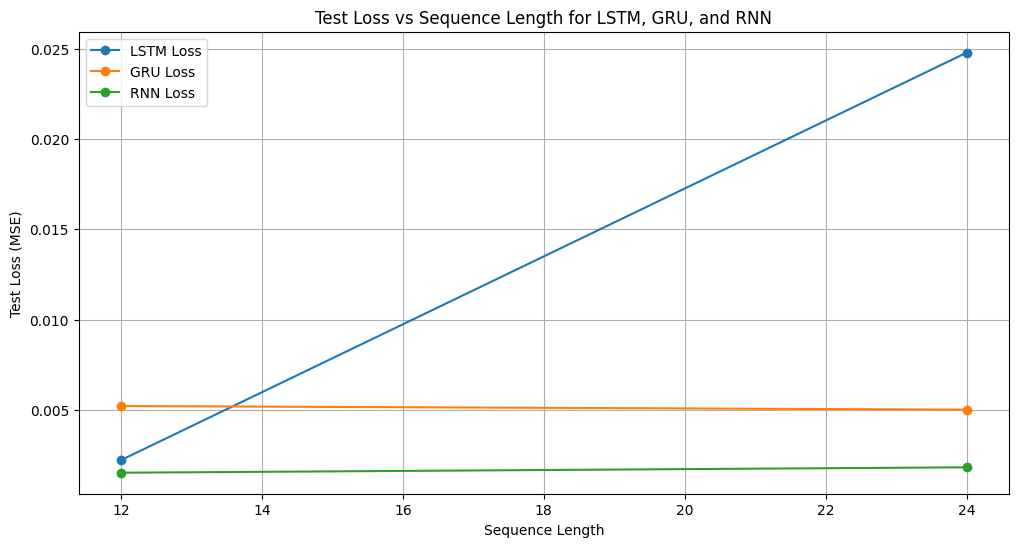

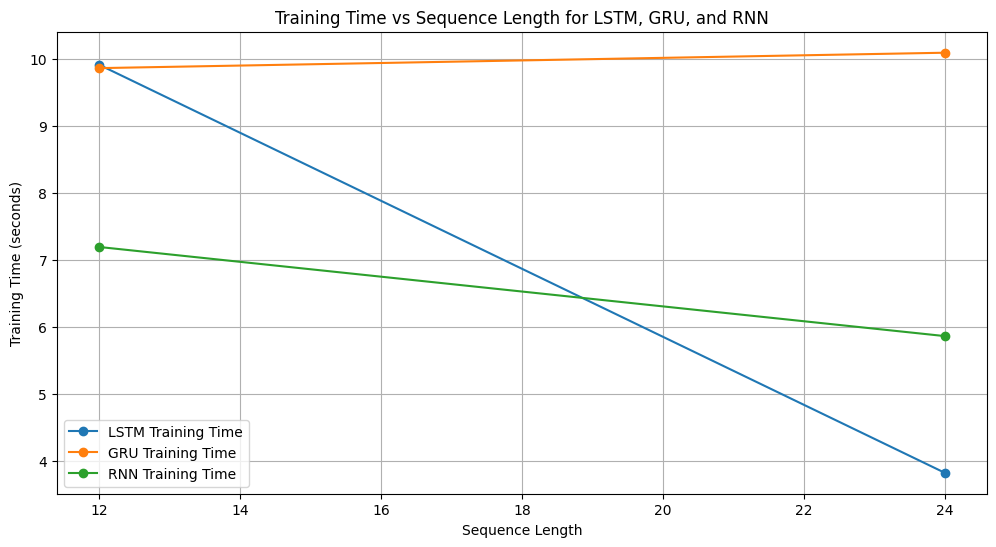

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for plotting
sequence_lengths = [12, 24]
lstm_losses = [0.0022, 0.0248]
gru_losses = [0.0052, 0.0050]
rnn_losses = [0.0015, 0.0018]

lstm_times = [9.91, 3.82]
gru_times = [9.86, 10.09]
rnn_times = [7.19, 5.86]

# Plot Test Loss vs Sequence Length
plt.figure(figsize=(12, 6))
plt.plot(sequence_lengths, lstm_losses, marker='o', label='LSTM Loss')
plt.plot(sequence_lengths, gru_losses, marker='o', label='GRU Loss')
plt.plot(sequence_lengths, rnn_losses, marker='o', label='RNN Loss')
plt.xlabel("Sequence Length")
plt.ylabel("Test Loss (MSE)")
plt.title("Test Loss vs Sequence Length for LSTM, GRU, and RNN")
plt.legend()
plt.grid(True)
plt.show()

# Plot Training Time vs Sequence Length
plt.figure(figsize=(12, 6))
plt.plot(sequence_lengths, lstm_times, marker='o', label='LSTM Training Time')
plt.plot(sequence_lengths, gru_times, marker='o', label='GRU Training Time')
plt.plot(sequence_lengths, rnn_times, marker='o', label='RNN Training Time')
plt.xlabel("Sequence Length")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs Sequence Length for LSTM, GRU, and RNN")
plt.legend()
plt.grid(True)
plt.show()
